# Itération 1

## Extraire l’ensemble des lignes du csv, stocker les infos dans un dataframe, nettoyer et regarder les données. 

### Extraction

In [2]:
import pandas as pd
df = pd.read_csv('data/trees.csv')

### Format des données + infos générales

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31243 entries, 0 to 31242
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ELEM_POINT_ID          31243 non-null  int64  
 1   CODE                   31243 non-null  object 
 2   NOM                    31243 non-null  object 
 3   GENRE                  31243 non-null  object 
 4   GENRE_DESC             31243 non-null  object 
 5   CATEGORIE              31243 non-null  object 
 6   CATEGORIE_DESC         31243 non-null  object 
 7   SOUS_CATEGORIE         31243 non-null  object 
 8   SOUS_CATEGORIE_DESC    31243 non-null  object 
 9   CODE_PARENT            31243 non-null  object 
 10  CODE_PARENT_DESC       31243 non-null  object 
 11  ADR_SECTEUR            31243 non-null  int64  
 12  BIEN_REFERENCE         31243 non-null  object 
 13  GENRE_BOTA             30728 non-null  object 
 14  ESPECE                 29053 non-null  object 
 15  VA

###  Nettoyage 

In [4]:
# On regarde le nombre de valeurs différentes par colonne
df.nunique()

ELEM_POINT_ID            31243
CODE                     31243
NOM                      31243
GENRE                        1
GENRE_DESC                   1
CATEGORIE                    1
CATEGORIE_DESC               1
SOUS_CATEGORIE               4
SOUS_CATEGORIE_DESC          4
CODE_PARENT               1447
CODE_PARENT_DESC          1447
ADR_SECTEUR                  6
BIEN_REFERENCE           31243
GENRE_BOTA                 112
ESPECE                     255
VARIETE                    146
STADEDEDEVELOPPEMENT         3
EQUIPE                       0
REMARQUES                    0
ANNEEDEPLANTATION           58
RAISONDEPLANTATION           3
TRAITEMENTCHENILLES          3
COURRIER                     0
IDENTIFIANTPLU              46
TYPEIMPLANTATIONPLU          4
INTITULEPROTECTIONPLU        3
ANNEEABATTAGE                0
ESSOUCHEMENT                 0
DIAMETREARBRE                0
CAUSEABATTAGE                0
COLLECTIVITE                 2
GeoJSON                  31242
dtype: i

In [8]:
# On enlève les colonnes qui ne possèdent qu'une seule valeur différente
cols_to_drop = [col for col in df.columns if df.nunique()[col] <= 1]
df = df.drop(columns=cols_to_drop)
df.head(5)

,ELEM_POINT_ID,CODE,NOM,SOUS_CATEGORIE,SOUS_CATEGORIE_DESC,CODE_PARENT,CODE_PARENT_DESC,ADR_SECTEUR,BIEN_REFERENCE,GENRE_BOTA,...,VARIETE,STADEDEDEVELOPPEMENT,ANNEEDEPLANTATION,RAISONDEPLANTATION,TRAITEMENTCHENILLES,IDENTIFIANTPLU,TYPEIMPLANTATIONPLU,INTITULEPROTECTIONPLU,COLLECTIVITE,GeoJSON
0,37993,ESP37969,ESP37969,ESP065,Arbre d'enceintes fermées,ESP37898,Maison des Collines Jard Poisat,6,AR37969,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{""type"":""Point"",""coordinates"":[5.7603469008942..."
1,37992,ESP37968,ESP37968,ESP065,Arbre d'enceintes fermées,ESP37898,Maison des Collines Jard Poisat,6,AR37968,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{""type"":""Point"",""coordinates"":[5.7598264646441..."
2,37991,ESP37967,ESP37967,ESP065,Arbre d'enceintes fermées,ESP37898,Maison des Collines Jard Poisat,6,AR37967,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{""type"":""Point"",""coordinates"":[5.7599807314486..."
3,37990,ESP37966,ESP37966,ESP065,Arbre d'enceintes fermées,ESP37898,Maison des Collines Jard Poisat,6,AR37966,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{""type"":""Point"",""coordinates"":[5.7600570301267..."
4,37989,ESP37965,ESP37965,ESP065,Arbre d'enceintes fermées,ESP37898,Maison des Collines Jard Poisat,6,AR37965,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{""type"":""Point"",""coordinates"":[5.7600202792924..."


In [10]:
# On regarde un peu la tête des données
df.sample(5)

,ELEM_POINT_ID,CODE,NOM,SOUS_CATEGORIE,SOUS_CATEGORIE_DESC,CODE_PARENT,CODE_PARENT_DESC,ADR_SECTEUR,BIEN_REFERENCE,GENRE_BOTA,...,VARIETE,STADEDEDEVELOPPEMENT,ANNEEDEPLANTATION,RAISONDEPLANTATION,TRAITEMENTCHENILLES,IDENTIFIANTPLU,TYPEIMPLANTATIONPLU,INTITULEPROTECTIONPLU,COLLECTIVITE,GeoJSON
12565,8079,ESP2642,ESP2642,ESP151,Arbre de voirie,ESP283,Esplan boulod et park relais,2,AR2642,Platanus,...,NaN,Arbre adulte,1975.0,NaN,NaN,NaN,NaN,NaN,Ville de Grenoble,"{""type"":""Point"",""coordinates"":[5.7163976044805..."
7080,12004,ESP17924,ESP17924,ESP174,Arbre d'espaces ouverts,ESP963,Caser Bonne Vallons Marceau,2,AR17924,Gleditsia,...,NaN,Arbre jeune,2012.0,NaN,NaN,NaN,NaN,NaN,Ville de Grenoble,"{""type"":""Point"",""coordinates"":[5.7224294494128..."
9814,4377,ESP11385,ESP11385,ESP174,Arbre d'espaces ouverts,ESP72,Rte de Clémencières square,2,AR11385,Fraxinus,...,NaN,Arbre adulte,1985.0,NaN,NaN,NaN,NaN,NaN,Ville de Grenoble,"{""type"":""Point"",""coordinates"":[5.7192509797374..."
19229,12621,ESP30840,ESP30840,ESP174,Arbre d'espaces ouverts,ESP839,Cité Mistral stab Sud 74,3,AR30840,Tilia,...,NaN,Arbre adulte,1994.0,NaN,NaN,NaN,NaN,NaN,Grenoble Alpes Métropole,"{""type"":""Point"",""coordinates"":[5.7040055480999..."
6837,4267,ESP11344,ESP11344,ESP151,Arbre de voirie,ESP960,Bd Esplan face n 02 à 44,2,AR11344,Platanus,...,NaN,Arbre adulte,1950.0,NaN,NaN,70.0,Alignement,L 123-1.7,Grenoble Alpes Métropole,"{""type"":""Point"",""coordinates"":[5.7181837159041..."


In [11]:
# Rendre visible toutes les colonnes du dataframe
pd.set_option('display.max_columns', len(df.columns))
df.sample(5)

,ELEM_POINT_ID,CODE,NOM,SOUS_CATEGORIE,SOUS_CATEGORIE_DESC,CODE_PARENT,CODE_PARENT_DESC,ADR_SECTEUR,BIEN_REFERENCE,GENRE_BOTA,ESPECE,VARIETE,STADEDEDEVELOPPEMENT,ANNEEDEPLANTATION,RAISONDEPLANTATION,TRAITEMENTCHENILLES,IDENTIFIANTPLU,TYPEIMPLANTATIONPLU,INTITULEPROTECTIONPLU,COLLECTIVITE,GeoJSON
20437,16886,ESP24451,ESP24451,ESP174,Arbre d'espaces ouverts,ESP632,Pc Alliance R Stalingrad,4,AR24451,Betula,alba,NaN,Arbre adulte,1995.0,NaN,NaN,NaN,NaN,NaN,Ville de Grenoble,"{""type"":""Point"",""coordinates"":[5.7236974953218..."
25080,24936,ESP22572,ESP22572,ESP151,Arbre de voirie,ESP745,R Dunant ang B de Montferrat,3,AR22572,Fraxinus,excelsior,NaN,Arbre adulte,1991.0,NaN,NaN,NaN,NaN,NaN,Grenoble Alpes Métropole,"{""type"":""Point"",""coordinates"":[5.7102883273017..."
14077,15926,ESP23118,ESP23118,ESP151,Arbre de voirie,ESP18,Sq Mutualité ang Chanrion,2,AR23118,Betula,verrucosa,NaN,Arbre adulte,1986.0,NaN,NaN,NaN,NaN,NaN,Grenoble Alpes Métropole,"{""type"":""Point"",""coordinates"":[5.7374874688461..."
29310,28309,ESP14949,ESP14949,ESP151,Arbre de voirie,ESP1088,R L Lagrange face école,4,AR14949,Populus,robusta,NaN,Arbre adulte,1974.0,NaN,NaN,NaN,NaN,NaN,Grenoble Alpes Métropole,"{""type"":""Point"",""coordinates"":[5.7208960640222..."
14054,1116,ESP9135,ESP9135,ESP151,Arbre de voirie,ESP313,Piscine Vaucanson,3,AR9135,Platanus,acerifolia,NaN,Arbre adulte,1972.0,NaN,NaN,NaN,NaN,NaN,Ville de Grenoble,"{""type"":""Point"",""coordinates"":[5.7091314669923..."


In [13]:
# On ne récupère finalement que les colonnes qui nous intéressent 
cols_of_interest = ["GENRE_BOTA", "ESPECE", "VARIETE", 
                    "STADEDEDEVELOPPEMENT", "ANNEEDEPLANTATION", 
                    "RAISONDEPLANTATION", "GeoJSON" ]

df_clean = df[cols_of_interest]
df_clean.sample(5)

,GENRE_BOTA,ESPECE,VARIETE,STADEDEDEVELOPPEMENT,ANNEEDEPLANTATION,RAISONDEPLANTATION,GeoJSON
22762,Platanus,acerifolia,NaN,Arbre adulte,1974.0,NaN,"{""type"":""Point"",""coordinates"":[5.7194592564866..."
27683,Picea,exelsa,NaN,Arbre adulte,1960.0,NaN,"{""type"":""Point"",""coordinates"":[5.7339232209622..."
24913,Aesculus,hippocastanum,NaN,Arbre adulte,1990.0,NaN,"{""type"":""Point"",""coordinates"":[5.7259564042696..."
13082,Acer,buergerianum,NaN,Arbre jeune,2013.0,NaN,"{""type"":""Point"",""coordinates"":[5.7391646071136..."
1522,Sophora,japonica,NaN,Arbre adulte,1974.0,NaN,"{""type"":""Point"",""coordinates"":[5.7225434449662..."


In [9]:
# On a gagné pas mal d'espace en mémoire déjà. 
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31243 entries, 0 to 31242
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   GENRE_BOTA            30728 non-null  object 
 1   ESPECE                29053 non-null  object 
 2   VARIETE               4039 non-null   object 
 3   STADEDEDEVELOPPEMENT  29228 non-null  object 
 4   ANNEEDEPLANTATION     30801 non-null  float64
 5   RAISONDEPLANTATION    1050 non-null   object 
 6   GeoJSON               31243 non-null  object 
dtypes: float64(1), object(6)
memory usage: 1.7+ MB


### Affichage des données

#### Afficher les 5 premières lignes de ce csv.  

In [10]:
df_clean.head(5)

,GENRE_BOTA,ESPECE,VARIETE,STADEDEDEVELOPPEMENT,ANNEEDEPLANTATION,RAISONDEPLANTATION,GeoJSON
0,NaN,NaN,NaN,NaN,NaN,NaN,"{""type"":""Point"",""coordinates"":[5.7603469008942..."
1,NaN,NaN,NaN,NaN,NaN,NaN,"{""type"":""Point"",""coordinates"":[5.7598264646441..."
2,NaN,NaN,NaN,NaN,NaN,NaN,"{""type"":""Point"",""coordinates"":[5.7599807314486..."
3,NaN,NaN,NaN,NaN,NaN,NaN,"{""type"":""Point"",""coordinates"":[5.7600570301267..."
4,NaN,NaN,NaN,NaN,NaN,NaN,"{""type"":""Point"",""coordinates"":[5.7600202792924..."


#### Afficher les 5 dernières lignes de ce csv.  

In [11]:
df_clean.tail(5)

,GENRE_BOTA,ESPECE,VARIETE,STADEDEDEVELOPPEMENT,ANNEEDEPLANTATION,RAISONDEPLANTATION,GeoJSON
31238,Fraxinus,oxycarpa,Flame,Arbre adulte,2001.0,NaN,"{""type"":""Point"",""coordinates"":[5.7117169490564..."
31239,Fraxinus,oxycarpa,Flame,Arbre adulte,2001.0,NaN,"{""type"":""Point"",""coordinates"":[5.7115904446110..."
31240,Fraxinus,oxycarpa,Flame,Arbre adulte,2001.0,NaN,"{""type"":""Point"",""coordinates"":[5.7114873970721..."
31241,Fraxinus,oxycarpa,Flame,Arbre adulte,2001.0,NaN,"{""type"":""Point"",""coordinates"":[5.7117859768817..."
31242,Fraxinus,oxycarpa,Flame,Arbre adulte,2001.0,NaN,"{""type"":""Point"",""coordinates"":[5.7113357012675..."


#### Afficher 5  lignes au hasard de ce csv.  

In [12]:
df_clean.sample(5)

,GENRE_BOTA,ESPECE,VARIETE,STADEDEDEVELOPPEMENT,ANNEEDEPLANTATION,RAISONDEPLANTATION,GeoJSON
16586,Pinus,nigra,NaN,Arbre adulte,1993.0,NaN,"{""type"":""Point"",""coordinates"":[5.7274467518061..."
1699,Acer,NaN,NaN,Arbre adulte,1985.0,NaN,"{""type"":""Point"",""coordinates"":[5.7038594831911..."
5572,Acer,NaN,NaN,Arbre jeune,1975.0,NaN,"{""type"":""Point"",""coordinates"":[5.7352533951814..."
10113,Quercus,palustris,Columnaris,Arbre jeune,1993.0,NaN,"{""type"":""Point"",""coordinates"":[5.7443213514786..."
23639,Pinus,nigra,Austriaca,Arbre adulte,1970.0,NaN,"{""type"":""Point"",""coordinates"":[5.7064258603262..."


#### Afficher une / des colonne(s) du dataframe 

In [13]:
# En utilsant la notation " [ ] "  ---> le résultat de sortie est une série 
df_clean["GENRE_BOTA"]

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
           ...   
31238    Fraxinus
31239    Fraxinus
31240    Fraxinus
31241    Fraxinus
31242    Fraxinus
Name: GENRE_BOTA, Length: 31243, dtype: object

In [14]:
# En utilsant la notation " . " ---> le résultat de sortie est une série 
df_clean.GENRE_BOTA

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
           ...   
31238    Fraxinus
31239    Fraxinus
31240    Fraxinus
31241    Fraxinus
31242    Fraxinus
Name: GENRE_BOTA, Length: 31243, dtype: object

In [15]:
# En utilisant la notation " [[ ]] "  ---> le résultat de sortie est un dataframe !
df_clean[["GENRE_BOTA"]]

,GENRE_BOTA
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
31238,Fraxinus
31239,Fraxinus
31240,Fraxinus
31241,Fraxinus


In [16]:
# En passant une liste de colonnes
df_clean[["GENRE_BOTA", "ESPECE", "VARIETE"]]

,GENRE_BOTA,ESPECE,VARIETE
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
31238,Fraxinus,oxycarpa,Flame
31239,Fraxinus,oxycarpa,Flame
31240,Fraxinus,oxycarpa,Flame
31241,Fraxinus,oxycarpa,Flame


### Manipulons les données

#### Combien d’arbres sont recensés dans ce jeu de données ?

In [17]:
# En utisant len
len(df_clean)

# En utilisant les infos... (déjà vu précédemment)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31243 entries, 0 to 31242
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   GENRE_BOTA            30728 non-null  object 
 1   ESPECE                29053 non-null  object 
 2   VARIETE               4039 non-null   object 
 3   STADEDEDEVELOPPEMENT  29228 non-null  object 
 4   ANNEEDEPLANTATION     30801 non-null  float64
 5   RAISONDEPLANTATION    1050 non-null   object 
 6   GeoJSON               31243 non-null  object 
dtypes: float64(1), object(6)
memory usage: 1.7+ MB


#### Pour combien d’arbres manque-t-il l’information concernant la date de plantation ? 

In [18]:
# isna() et isnull() sont identiques. Vous pouvez choisir une option ou l'autre. 
df_clean.ANNEEDEPLANTATION.isna().sum()
df_clean.ANNEEDEPLANTATION.isnull().sum()

442

#### Nombre de fois qu'une année apparait dans le dataset

In [19]:
df_clean.ANNEEDEPLANTATION.value_counts(dropna=False)

1975.0    3922
2001.0    1626
1980.0    1528
1970.0    1444
2015.0     996
1985.0     990
1976.0     972
1978.0     912
2014.0     881
1995.0     781
1987.0     771
1965.0     760
1960.0     745
2009.0     696
1984.0     666
1981.0     644
2006.0     616
1977.0     616
1999.0     603
2011.0     530
2010.0     467
2000.0     461
2005.0     450
1982.0     448
NaN        442
1990.0     433
1950.0     422
1996.0     385
1972.0     364
1979.0     361
2003.0     352
2004.0     352
1969.0     350
1974.0     350
2016.0     347
2002.0     341
2012.0     338
2013.0     335
1983.0     333
1989.0     307
1994.0     288
2017.0     272
1988.0     266
1986.0     238
1997.0     238
1992.0     226
1998.0     220
2008.0     219
1993.0     161
2007.0     155
1991.0     146
1968.0     116
1966.0      95
1971.0      75
1955.0      66
1967.0      57
1973.0      34
1961.0      27
1964.0       7
Name: ANNEEDEPLANTATION, dtype: int64

#### On sélectionne les lignes où l'information sur l'année est manquante

In [23]:
serie_annees_manquantes = df_clean.ANNEEDEPLANTATION.isnull()
serie_annees_manquantes

0         True
1         True
2         True
3         True
4         True
         ...  
31238    False
31239    False
31240    False
31241    False
31242    False
Name: ANNEEDEPLANTATION, Length: 31243, dtype: bool

In [26]:
df.loc[serie_annees_manquantes]

,ELEM_POINT_ID,CODE,NOM,SOUS_CATEGORIE,SOUS_CATEGORIE_DESC,CODE_PARENT,CODE_PARENT_DESC,ADR_SECTEUR,BIEN_REFERENCE,GENRE_BOTA,ESPECE,VARIETE,STADEDEDEVELOPPEMENT,ANNEEDEPLANTATION,RAISONDEPLANTATION,TRAITEMENTCHENILLES,IDENTIFIANTPLU,TYPEIMPLANTATIONPLU,INTITULEPROTECTIONPLU,COLLECTIVITE,GeoJSON
0,37993,ESP37969,ESP37969,ESP065,Arbre d'enceintes fermées,ESP37898,Maison des Collines Jard Poisat,6,AR37969,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{""type"":""Point"",""coordinates"":[5.7603469008942..."
1,37992,ESP37968,ESP37968,ESP065,Arbre d'enceintes fermées,ESP37898,Maison des Collines Jard Poisat,6,AR37968,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{""type"":""Point"",""coordinates"":[5.7598264646441..."
2,37991,ESP37967,ESP37967,ESP065,Arbre d'enceintes fermées,ESP37898,Maison des Collines Jard Poisat,6,AR37967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{""type"":""Point"",""coordinates"":[5.7599807314486..."
3,37990,ESP37966,ESP37966,ESP065,Arbre d'enceintes fermées,ESP37898,Maison des Collines Jard Poisat,6,AR37966,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{""type"":""Point"",""coordinates"":[5.7600570301267..."
4,37989,ESP37965,ESP37965,ESP065,Arbre d'enceintes fermées,ESP37898,Maison des Collines Jard Poisat,6,AR37965,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{""type"":""Point"",""coordinates"":[5.7600202792924..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29809,39003,ESP38377,ESP38377,ESP174,Arbre d'espaces ouverts,ESP1260,Al Romantiques Musset LBruyère,6,AR38377,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{""type"":""Point"",""coordinates"":[5.7256767538914..."
29810,39002,ESP38376,ESP38376,ESP174,Arbre d'espaces ouverts,ESP1260,Al Romantiques Musset LBruyère,6,AR38376,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{""type"":""Point"",""coordinates"":[5.7257038405872..."
29811,39001,ESP38375,ESP38375,ESP174,Arbre d'espaces ouverts,ESP1260,Al Romantiques Musset LBruyère,6,AR38375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{""type"":""Point"",""coordinates"":[5.7256734664315..."
29813,38983,ESP38374,ESP38374,ESP174,Arbre d'espaces ouverts,ESP1260,Al Romantiques Musset LBruyère,6,AR38374,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{""type"":""Point"",""coordinates"":[5.7256591993188..."


#### Combien d’arbres ont été plantés l’année de votre naissance ? 


In [21]:
# On peut filtrer les données 
df_clean[df_clean.ANNEEDEPLANTATION == 1987]

,GENRE_BOTA,ESPECE,VARIETE,STADEDEDEVELOPPEMENT,ANNEEDEPLANTATION,RAISONDEPLANTATION,GeoJSON
1192,Platanus,acerifolia,NaN,Arbre adulte,1987.0,NaN,"{""type"":""Point"",""coordinates"":[5.7206351305938..."
1193,Platanus,acerifolia,NaN,Arbre adulte,1987.0,NaN,"{""type"":""Point"",""coordinates"":[5.7207565851719..."
1194,Platanus,acerifolia,NaN,Arbre adulte,1987.0,NaN,"{""type"":""Point"",""coordinates"":[5.7206926924567..."
1195,Magnolia,grandiflora,NaN,Arbre adulte,1987.0,NaN,"{""type"":""Point"",""coordinates"":[5.7176343333827..."
1196,Magnolia,grandiflora,NaN,Arbre adulte,1987.0,NaN,"{""type"":""Point"",""coordinates"":[5.7178546100001..."
...,...,...,...,...,...,...,...
30845,Platanus,acerifolia,NaN,Arbre adulte,1987.0,NaN,"{""type"":""Point"",""coordinates"":[5.7184042964249..."
30846,Betula,verrucosa,NaN,Arbre adulte,1987.0,NaN,"{""type"":""Point"",""coordinates"":[5.7190032099285..."
30847,Platanus,acerifolia,NaN,Arbre adulte,1987.0,NaN,"{""type"":""Point"",""coordinates"":[5.7191985370740..."
30848,Pinus,sylvestris,NaN,Arbre adulte,1987.0,NaN,"{""type"":""Point"",""coordinates"":[5.7202054221388..."


In [22]:
# Et ainsi demander leur taille
len(df_clean[df_clean.ANNEEDEPLANTATION == 1987])

771

In [23]:
# On peut récupérer le nombre d'entrées par année
# cf question "Combien d’arbres ont été plantés année par année (ex : 1987 : 771, 1988 : 266, etc…) ?"
df_clean.ANNEEDEPLANTATION.value_counts()

1975.0    3922
2001.0    1626
1980.0    1528
1970.0    1444
2015.0     996
1985.0     990
1976.0     972
1978.0     912
2014.0     881
1995.0     781
1987.0     771
1965.0     760
1960.0     745
2009.0     696
1984.0     666
1981.0     644
1977.0     616
2006.0     616
1999.0     603
2011.0     530
2010.0     467
2000.0     461
2005.0     450
1982.0     448
1990.0     433
1950.0     422
1996.0     385
1972.0     364
1979.0     361
2003.0     352
2004.0     352
1969.0     350
1974.0     350
2016.0     347
2002.0     341
2012.0     338
2013.0     335
1983.0     333
1989.0     307
1994.0     288
2017.0     272
1988.0     266
1986.0     238
1997.0     238
1992.0     226
1998.0     220
2008.0     219
1993.0     161
2007.0     155
1991.0     146
1968.0     116
1966.0      95
1971.0      75
1955.0      66
1967.0      57
1973.0      34
1961.0      27
1964.0       7
Name: ANNEEDEPLANTATION, dtype: int64

In [24]:
# Idem mais en faisant apparaître les NaN également
df_clean.ANNEEDEPLANTATION.value_counts(dropna=False)

1975.0    3922
2001.0    1626
1980.0    1528
1970.0    1444
2015.0     996
1985.0     990
1976.0     972
1978.0     912
2014.0     881
1995.0     781
1987.0     771
1965.0     760
1960.0     745
2009.0     696
1984.0     666
1981.0     644
2006.0     616
1977.0     616
1999.0     603
2011.0     530
2010.0     467
2000.0     461
2005.0     450
1982.0     448
NaN        442
1990.0     433
1950.0     422
1996.0     385
1972.0     364
1979.0     361
2003.0     352
2004.0     352
1969.0     350
1974.0     350
2016.0     347
2002.0     341
2012.0     338
2013.0     335
1983.0     333
1989.0     307
1994.0     288
2017.0     272
1988.0     266
1986.0     238
1997.0     238
1992.0     226
1998.0     220
2008.0     219
1993.0     161
2007.0     155
1991.0     146
1968.0     116
1966.0      95
1971.0      75
1955.0      66
1967.0      57
1973.0      34
1961.0      27
1964.0       7
Name: ANNEEDEPLANTATION, dtype: int64

In [25]:
# On peut se servir de ça pour récupérer les données voulues
df_clean.ANNEEDEPLANTATION.value_counts(dropna=False)[1987]

771

#### Quelle est la plus ancienne année de plantation recensée dans ce dataset ? La plus récente ?    

In [26]:
# La plus ancienne 
df_clean.ANNEEDEPLANTATION.min()

1950.0

In [27]:
# La plus récente 
df_clean.ANNEEDEPLANTATION.max()

2017.0

#### Combien d’arbres ont été plantés en moyenne chaque année ?   


In [28]:
df_clean.ANNEEDEPLANTATION.value_counts().mean()

531.051724137931

#### Pour combien d'arbres manque-t-il l’information concernant le genre botanique ?

In [29]:
df_clean.GENRE_BOTA.isna().sum()

515

#### Histogramme représentant le nombre d’arbres plantés par année.

Text(0, 0.5, "Nombre d'arbres plantés")

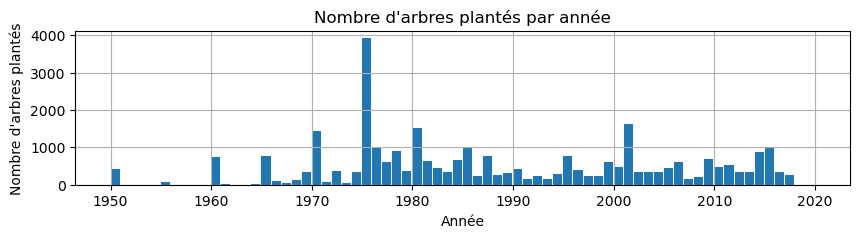

In [76]:
ax = df_clean.hist(
    column="ANNEEDEPLANTATION", 
    bins=list(range(1950,2021)),
    figsize=(10,2),
    width=0.9
)

ax[0][0].set_title("Nombre d'arbres plantés par année")
ax[0][0].set_xlabel("Année")
ax[0][0].set_ylabel("Nombre d'arbres plantés")

### Itération 2 

#### Pour commencer, identifiez tous les genres botaniques représentés à Grenoble.  Essayez plusieurs manières de résoudre ce problème.  

In [31]:
df_clean.GENRE_BOTA.dropna().unique()

array(['Platanus', 'Ginkgo', 'Salix', 'Liriodendron', 'Catalpa', 'Pyrus',
       'Robinia', 'Acer', 'Zelkova', 'Parrotia', 'Fraxinus', 'Fagus',
       'Magnolia', 'Taxus', 'Alnus', 'Picea', 'Cupressus',
       'Sequoiadendron', 'Pinus', 'Betula', 'Tilia', 'Cedrus', 'Populus',
       'Celtis', 'Thuja', 'Sorbus', 'Sophora', 'Liquidambar', 'Prunus',
       'Calocedrus', 'Paulownia', 'Gymnocladus', 'Ulmus', 'Corylus',
       'Morus', 'Clerodendron', 'Gleditsia', 'Libocedrus', 'Quercus',
       'Lagerstroemia', 'Taxodium', 'Amélanchier', 'Cercidiphyllum',
       'Ilex', 'Malus', 'Cedrela', 'Photinia', 'Tetradium',
       'Koelreuteria', 'Halesia', 'Crataegus', 'Aesculus', 'Ptelea',
       'Chimonanthus', 'Carpinus', 'Metasequoia', 'Cercis', 'Cornus',
       'Juglans', 'Pteroceltis', 'Broussonetia', 'Phellodendron',
       'Cupressocyparis', 'Cydonia', 'Ficus', 'Eleagnus', 'Lonicera',
       'Albizia', 'Pterocarya', 'Davidia', 'Buxus', 'Cladastris',
       'Chionanthus', 'Syringa', 'Abies', 

#### Identifiez maintenant toutes les espèces différentes présentes à Grenoble. N’oubliez pas que les espèces sont une sous catégorie de genre botanique ! (l’espèce est ‘Platanus Acerifolia’ et pas uniquement ‘Acerifolia’) 

In [49]:
serie_especes = df_clean.GENRE_BOTA + " " + df_clean.ESPECE
serie_especes.unique()

array([nan, 'Ginkgo biloba', 'Liriodendron tulipifera',
       'Catalpa bignonoides', 'Platanus acerifolia',
       'Robinia pseudoacacia', 'Acer grosseri', 'Zelkova serrata',
       'Parrotia persica', 'Fraxinus excelsior', 'Fagus sylvatica',
       'Acer negundo', 'Magnolia grandiflora', 'Taxus baccata',
       'Alnus cordata', 'Picea abies', 'Cupressus arizonica',
       'Sequoiadendron giganteum', 'Pyrus calleryana', 'Pinus nigra',
       'Betula verrucosa', 'Tilia platyphyllos', 'Acer pseudoplatanus',
       'Tilia tomentosa', 'Acer platanoides', 'Cedrus deodara',
       'Pinus sylvestris', 'Populus alba', 'Celtis australis',
       'Tilia cordata', 'Populus nigra', 'Sorbus aria',
       'Sophora japonica', 'Acer cappadocicum', 'Acer campestre',
       'Acer saccharinum', 'Liquidambar styraciflua', 'Prunus spinosa',
       'Cedrus atlantica', 'Calocedrus decurrens', 'Pinus wallichiana',
       'Prunus cerasus', 'Paulownia tomentosa', 'Sorbus aucuparia',
       'Gymnocladus dioicus

In [51]:
# En utilisant le set 
especes = set(df_clean.GENRE_BOTA + " " + df_clean.ESPECE)
especes

{'Abies concolor',
 'Abies koreana',
 'Abies nordmaniana',
 'Abies pinsapo',
 'Acer buergerianum',
 'Acer campestre',
 'Acer capillipes',
 'Acer cappadocicum',
 'Acer carpinifolia',
 'Acer davidii',
 'Acer freemanii',
 'Acer ginnala',
 'Acer griseum',
 'Acer grosseri',
 'Acer heldreichii',
 'Acer hippocastanum',
 'Acer japonicum',
 'Acer monspessulanum',
 'Acer negundo',
 'Acer nikoense',
 'Acer opalus',
 'Acer palmatum',
 'Acer platanoides',
 'Acer pseudoplatanus',
 'Acer rubrum',
 'Acer saccharinum',
 'Acer tartarica',
 'Acer triflorum',
 'Acer utilis',
 'Acer zoeschense',
 'Aesculus carnea',
 'Aesculus chandelle seche',
 'Aesculus hippocastanum',
 'Aesculus parviflora',
 'Aesculus pavia',
 'Ailanthus altissima',
 'Albizia jullibrissin',
 'Alnus cordata',
 'Alnus glutinosa',
 'Alnus incana',
 'Alnus spaethii',
 'Amélanchier alnifolia',
 'Amélanchier canadensis',
 'Amélanchier laevis',
 'Amélanchier lamarckii',
 'Amélanchier ovalis',
 'Araucaria exelsa',
 'Betula alba',
 'Betula nigra

In [52]:
# On retire le nan en utilisant np
from numpy import nan
especes.discard(nan)
especes

{'Abies concolor',
 'Abies koreana',
 'Abies nordmaniana',
 'Abies pinsapo',
 'Acer buergerianum',
 'Acer campestre',
 'Acer capillipes',
 'Acer cappadocicum',
 'Acer carpinifolia',
 'Acer davidii',
 'Acer freemanii',
 'Acer ginnala',
 'Acer griseum',
 'Acer grosseri',
 'Acer heldreichii',
 'Acer hippocastanum',
 'Acer japonicum',
 'Acer monspessulanum',
 'Acer negundo',
 'Acer nikoense',
 'Acer opalus',
 'Acer palmatum',
 'Acer platanoides',
 'Acer pseudoplatanus',
 'Acer rubrum',
 'Acer saccharinum',
 'Acer tartarica',
 'Acer triflorum',
 'Acer utilis',
 'Acer zoeschense',
 'Aesculus carnea',
 'Aesculus chandelle seche',
 'Aesculus hippocastanum',
 'Aesculus parviflora',
 'Aesculus pavia',
 'Ailanthus altissima',
 'Albizia jullibrissin',
 'Alnus cordata',
 'Alnus glutinosa',
 'Alnus incana',
 'Alnus spaethii',
 'Amélanchier alnifolia',
 'Amélanchier canadensis',
 'Amélanchier laevis',
 'Amélanchier lamarckii',
 'Amélanchier ovalis',
 'Araucaria exelsa',
 'Betula alba',
 'Betula nigra

In [58]:
# En utilisant les opérations str vectorisées
serie = df_clean.GENRE_BOTA.str.cat(df_clean.ESPECE, sep =" ")
serie.unique()

array([nan, 'Ginkgo biloba', 'Liriodendron tulipifera',
       'Catalpa bignonoides', 'Platanus acerifolia',
       'Robinia pseudoacacia', 'Acer grosseri', 'Zelkova serrata',
       'Parrotia persica', 'Fraxinus excelsior', 'Fagus sylvatica',
       'Acer negundo', 'Magnolia grandiflora', 'Taxus baccata',
       'Alnus cordata', 'Picea abies', 'Cupressus arizonica',
       'Sequoiadendron giganteum', 'Pyrus calleryana', 'Pinus nigra',
       'Betula verrucosa', 'Tilia platyphyllos', 'Acer pseudoplatanus',
       'Tilia tomentosa', 'Acer platanoides', 'Cedrus deodara',
       'Pinus sylvestris', 'Populus alba', 'Celtis australis',
       'Tilia cordata', 'Populus nigra', 'Sorbus aria',
       'Sophora japonica', 'Acer cappadocicum', 'Acer campestre',
       'Acer saccharinum', 'Liquidambar styraciflua', 'Prunus spinosa',
       'Cedrus atlantica', 'Calocedrus decurrens', 'Pinus wallichiana',
       'Prunus cerasus', 'Paulownia tomentosa', 'Sorbus aucuparia',
       'Gymnocladus dioicus

#### Compter le nombre de représentants de chaque genre botanique

In [35]:
df_clean.GENRE_BOTA.value_counts()

Acer          5276
Platanus      4663
Pinus         2118
Tilia         1770
Fraxinus      1506
              ... 
Rhamnus          1
Sequoia          1
Castanea         1
Sorbopyrus       1
Eucalyptus       1
Name: GENRE_BOTA, Length: 112, dtype: int64

##### Quel est le genre botanique le plus représenté ?

In [36]:
df_clean.GENRE_BOTA.value_counts().idxmax()

'Acer'

##### Listez tous les représentants uniques de leurs genre botanique  

In [37]:
# Option 1 : comprehension
genres_bota = df_clean.GENRE_BOTA.dropna().unique()
solitaires = [genre for genre in genres_bota if df_clean.GENRE_BOTA.value_counts()[genre] == 1]
solitaires

['Sterculia',
 'Rhamnus',
 'Castanea',
 'Eucalyptus',
 'Staphylea',
 'Sequoia',
 'Nyssa',
 'Sciadopitys',
 'Sorbopyrus',
 'Poncinos']

In [38]:
# Option 2 : avec pandas directement
value_counts = df_clean.GENRE_BOTA.value_counts()
value_counts[value_counts == 1].index

Index(['Nyssa', 'Sterculia', 'Sciadopitys', 'Staphylea', 'Poncinos', 'Rhamnus',
       'Sequoia', 'Castanea', 'Sorbopyrus', 'Eucalyptus'],
      dtype='object')

#### (plus dur) Comment la pratique de plantation a-t-elle évolué au cours du temps ? Diversifie-t-on plus maintenant qu’avant ? Vos analyses sont-elles en accord avec le communiqué de presse ? 

In [59]:
# 3 genres dominants
liste_genre_dominants = (list(df_clean.groupby('GENRE_BOTA')
                                      .size()
                                      .sort_values(ascending=False)[:3]
                                      .index))
liste_genre_dominants

['Acer', 'Platanus', 'Pinus']

In [62]:
# On calcule le nbre d'Acer, Platanus et Pinus plantés chaque année
dominants_per_year = (df_clean.loc[df_clean.GENRE_BOTA.isin(liste_genre_dominants)]
                              .groupby(['ANNEEDEPLANTATION', "GENRE_BOTA"])
                              .size())
dominants_per_year

ANNEEDEPLANTATION  GENRE_BOTA
1950.0             Platanus      381
1955.0             Platanus       45
1960.0             Acer           69
                   Pinus          64
                   Platanus      155
                                ... 
2016.0             Acer           41
                   Platanus       37
2017.0             Acer           50
                   Pinus           6
                   Platanus       40
Length: 155, dtype: int64

In [67]:
# Unstack
dominants_per_year.unstack().fillna(0).astype(int).head()

GENRE_BOTA,Acer,Pinus,Platanus
ANNEEDEPLANTATION,,,
1950.0,0,0,381
1955.0,0,0,45
1960.0,69,64,155
1964.0,0,0,7
1965.0,64,24,316


In [68]:
# Calcul du nbre d'arbres plantés chaque année
nbre_arbres_plantes_per_year = df_clean.groupby("ANNEEDEPLANTATION").size()
nbre_arbres_plantes_per_year.head()

ANNEEDEPLANTATION
1950.0    422
1955.0     66
1960.0    745
1961.0     27
1964.0      7
dtype: int64

In [70]:
# On calcule la proportion de chacun de ces 3 genres par rapport au total
props = (dominants_per_year / nbre_arbres_plantes_per_year * 100).astype(int) 
props

ANNEEDEPLANTATION  GENRE_BOTA
1950.0             Platanus      90
1955.0             Platanus      68
1960.0             Acer           9
                   Pinus          8
                   Platanus      20
                                 ..
2016.0             Acer          11
                   Platanus      10
2017.0             Acer          18
                   Pinus          2
                   Platanus      14
Length: 155, dtype: int64

In [71]:
# On affiche d'une manière dataframe
props.unstack().fillna('').head()

GENRE_BOTA,Acer,Pinus,Platanus
ANNEEDEPLANTATION,,,
1950.0,,,90.0
1955.0,,,68.0
1960.0,9.0,8.0,20.0
1964.0,,,100.0
1965.0,8.0,3.0,41.0


Text(0.5, 1.0, 'Proportions des 3 genres dominants par rapport au total')

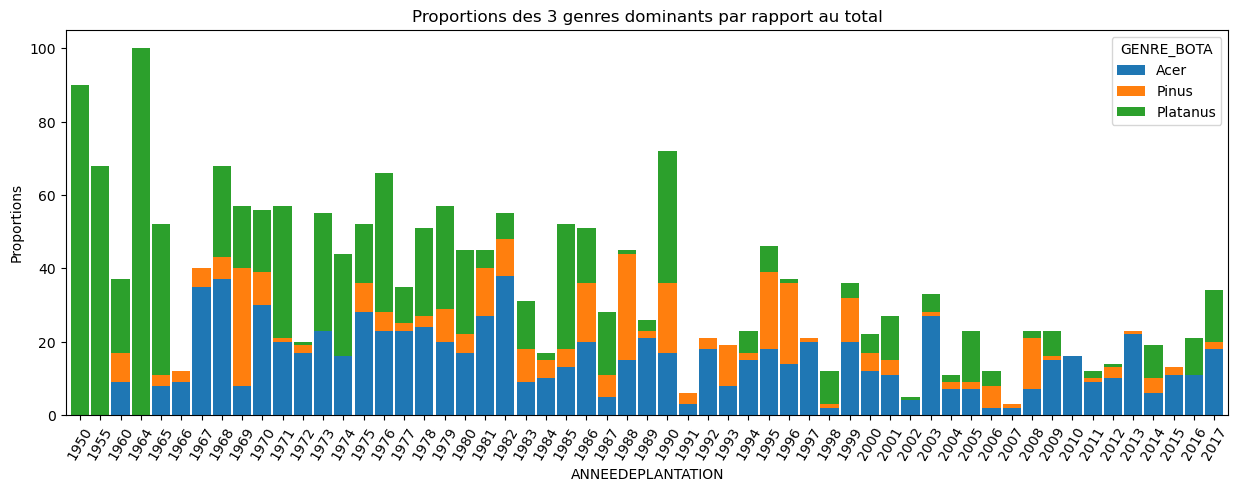

In [89]:
# On plot avec pandas avec l'option "bar" et "stacked"
df_proportions = props.unstack()
df_proportions.index = df_proportions.index.astype(int)

ax = df_proportions.plot(kind = "bar",
                         figsize=(15, 5), 
                         stacked=True, 
                         width=0.9, 
                         rot=60)

ax.set_ylabel("Proportions")
ax.set_title("Proportions des 3 genres dominants par rapport au total")

### Plusieurs sources évoquent une espérance de vie moyenne des arbres en ville de 30 à 80 ans. Les données de terrain disponibles pour Grenoble corroborent-elles ces sources ?   


In [99]:
# Methode 1 : à l'arrache !
df_clean["age"] = 2017 - df_clean["ANNEEDEPLANTATION"]
df_ages = df_clean.loc[:, ["age", "STADEDEDEVELOPPEMENT"]].dropna()
df_ages.sample(5)

/tmp/ipykernel_10120/937029487.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["age"] = 2017 - df_clean["ANNEEDEPLANTATION"]


,age,STADEDEDEVELOPPEMENT
13755,39.0,Arbre adulte
4910,32.0,Arbre adulte
27399,23.0,Arbre adulte
5813,16.0,Arbre adulte
965,37.0,Arbre vieillissant


In [100]:
# Methode 2 : assign
df_clean.assign(AGE = lambda x: 2017 - x.ANNEEDEPLANTATION) 

,GENRE_BOTA,ESPECE,VARIETE,STADEDEDEVELOPPEMENT,ANNEEDEPLANTATION,RAISONDEPLANTATION,GeoJSON,age,AGE
0,NaN,NaN,NaN,NaN,NaN,NaN,"{""type"":""Point"",""coordinates"":[5.7603469008942...",NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,"{""type"":""Point"",""coordinates"":[5.7598264646441...",NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,"{""type"":""Point"",""coordinates"":[5.7599807314486...",NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,"{""type"":""Point"",""coordinates"":[5.7600570301267...",NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,"{""type"":""Point"",""coordinates"":[5.7600202792924...",NaN,NaN
...,...,...,...,...,...,...,...,...,...
31238,Fraxinus,oxycarpa,Flame,Arbre adulte,2001.0,NaN,"{""type"":""Point"",""coordinates"":[5.7117169490564...",16.0,16.0
31239,Fraxinus,oxycarpa,Flame,Arbre adulte,2001.0,NaN,"{""type"":""Point"",""coordinates"":[5.7115904446110...",16.0,16.0
31240,Fraxinus,oxycarpa,Flame,Arbre adulte,2001.0,NaN,"{""type"":""Point"",""coordinates"":[5.7114873970721...",16.0,16.0
31241,Fraxinus,oxycarpa,Flame,Arbre adulte,2001.0,NaN,"{""type"":""Point"",""coordinates"":[5.7117859768817...",16.0,16.0


In [101]:
df_ages.groupby('STADEDEDEVELOPPEMENT').describe()

age                                               \
                        count       mean        std  min   25%   50%   75%   
STADEDEDEVELOPPEMENT                                                         
Arbre adulte          23875.0  34.249592  12.979591  3.0  23.0  37.0  42.0   
Arbre jeune            5170.0   8.926112  10.334376  1.0   3.0   6.0   9.0   
Arbre vieillissant      183.0  47.437158  14.940730  7.0  37.0  47.0  67.0   

                            
                       max  
STADEDEDEVELOPPEMENT        
Arbre adulte          67.0  
Arbre jeune           67.0  
Arbre vieillissant    67.0